<a href="https://colab.research.google.com/github/BhardwajG572/21_day_21_projects/blob/main/PROJECT_4_Heart_Disease_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder  # why standardscaler ?
#from sklearn.compose import ColumnTransformer       # for model pipeline
#from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , precision_score, recall_score, f1_score


sns.set_style("whitegrid")


In [2]:
# Download the dataset using the kaggle HUB API
print("Downloading dataset .. . . ")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the data set from the downloaded path :
file_path = f'{path}/heart_disease_uci.csv'
df=pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape :{df.shape}")
df.head()


Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully.
Data shape :(920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Step 2 : Exploratory Data Analysis :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
df['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [5]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [6]:
df['trestbps'].median()

130.0

In [7]:
#df['trestbps'].replace("nan",df['trestbps'].median(),inplace=True)

## 2.1 : Analysis of the Target variable:


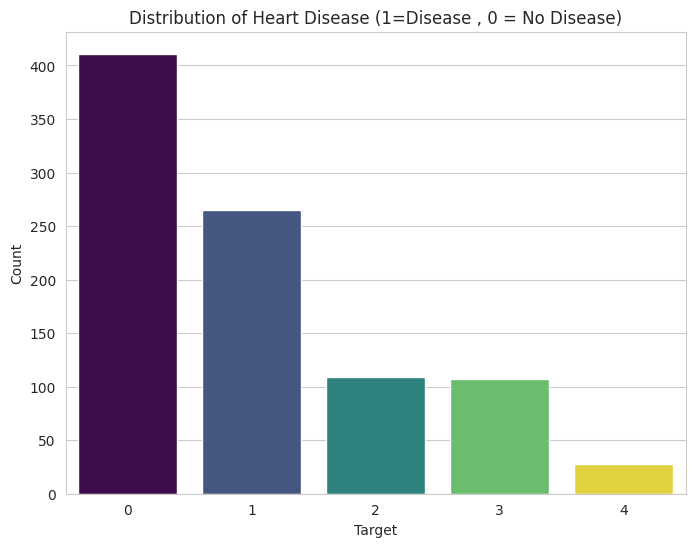

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='num',data=df,palette='viridis',hue='num',legend=False)
plt.title("Distribution of Heart Disease (1=Disease , 0 = No Disease)")
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()
#sns.countplot(x='target',data=df)

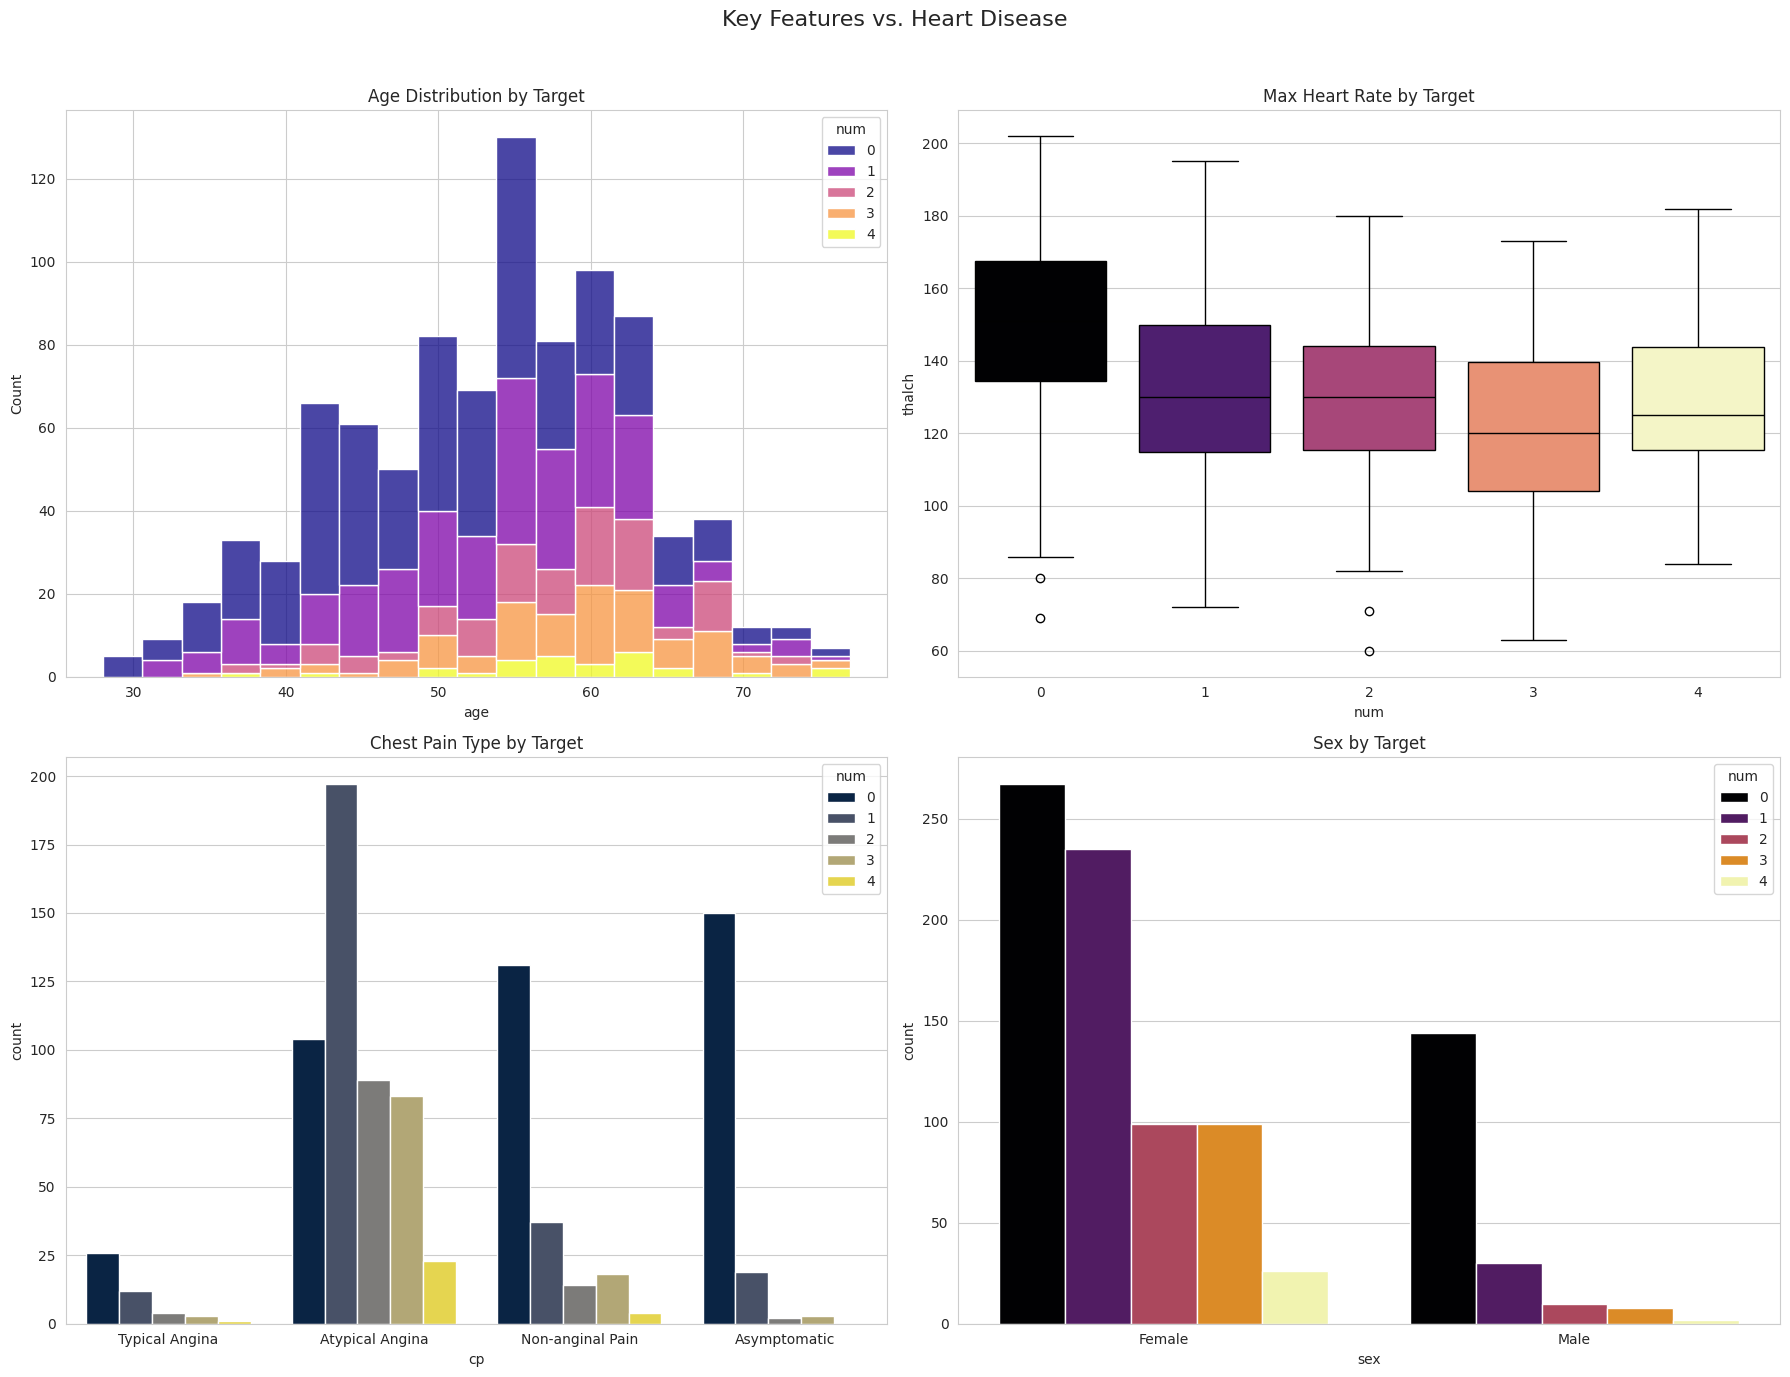

In [9]:
# Let's visualize the relationship between key features and the target
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

# Age vs. Target
sns.histplot(ax=axes[0, 0], data=df, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

# Max Heart Rate vs. Target
sns.boxplot(ax=axes[0, 1], data=df, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[1, 0], data=df, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[1, 1], data=df, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

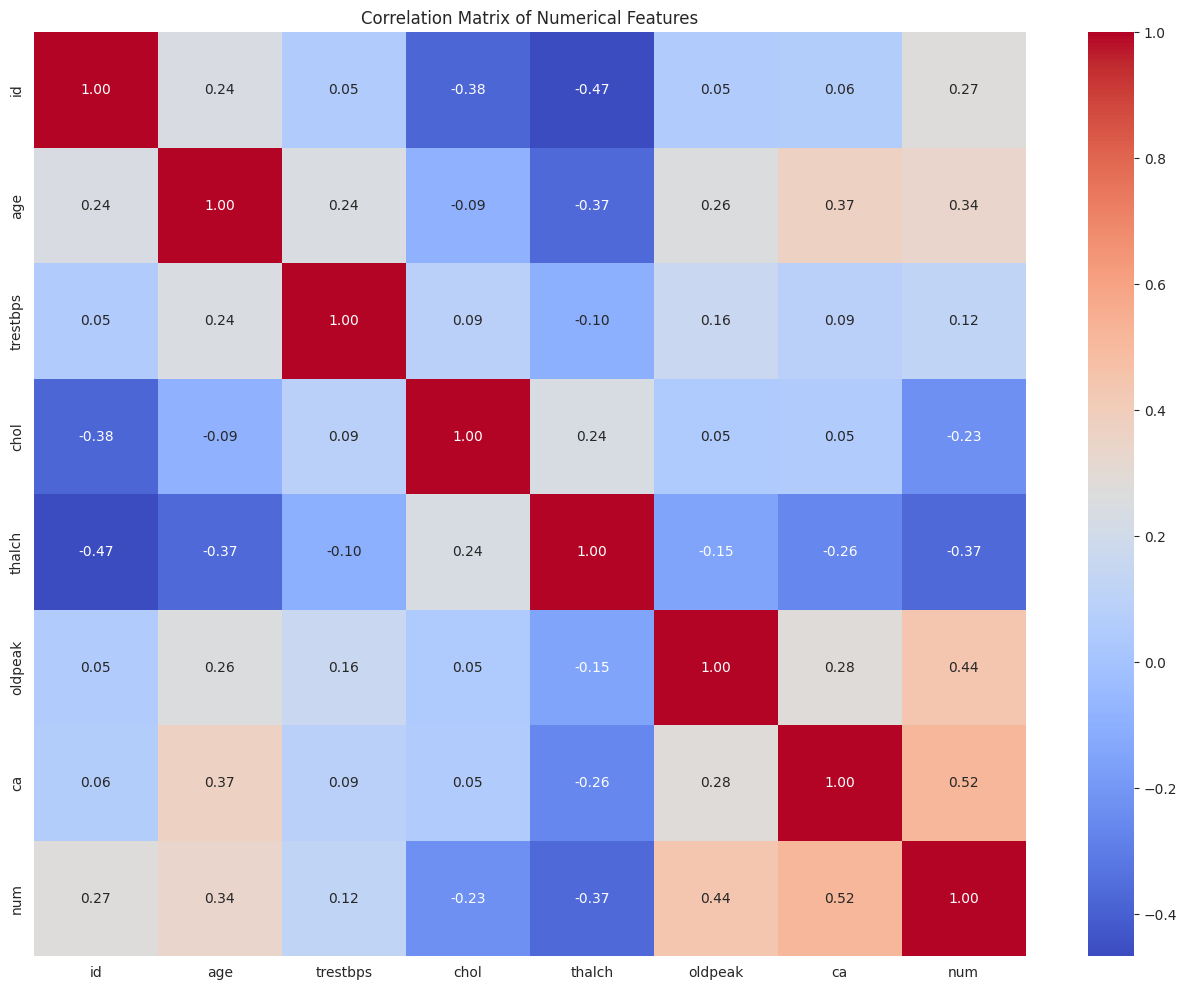

In [10]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [12]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [13]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


## Step 2: Analyze target variable

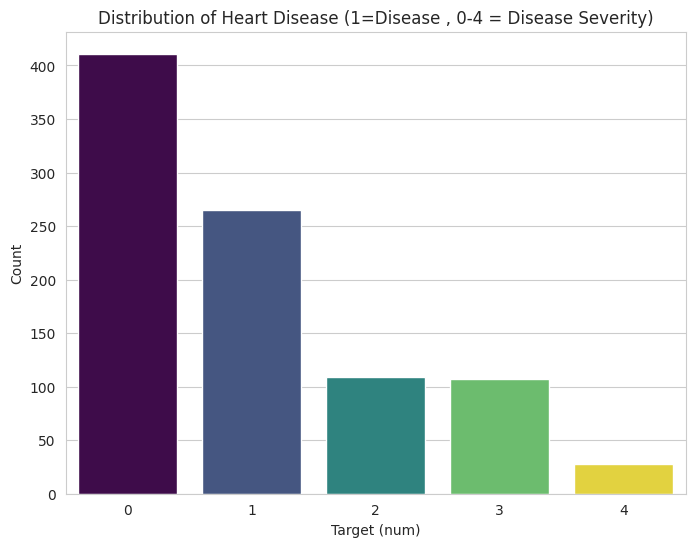

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x='num',data=df,palette='viridis',hue='num',legend=False)
plt.title("Distribution of Heart Disease (1=Disease , 0-4 = Disease Severity)")
plt.xlabel('Target (num)')
plt.ylabel('Count')
plt.show()

## Step 3: Analyze numerical features

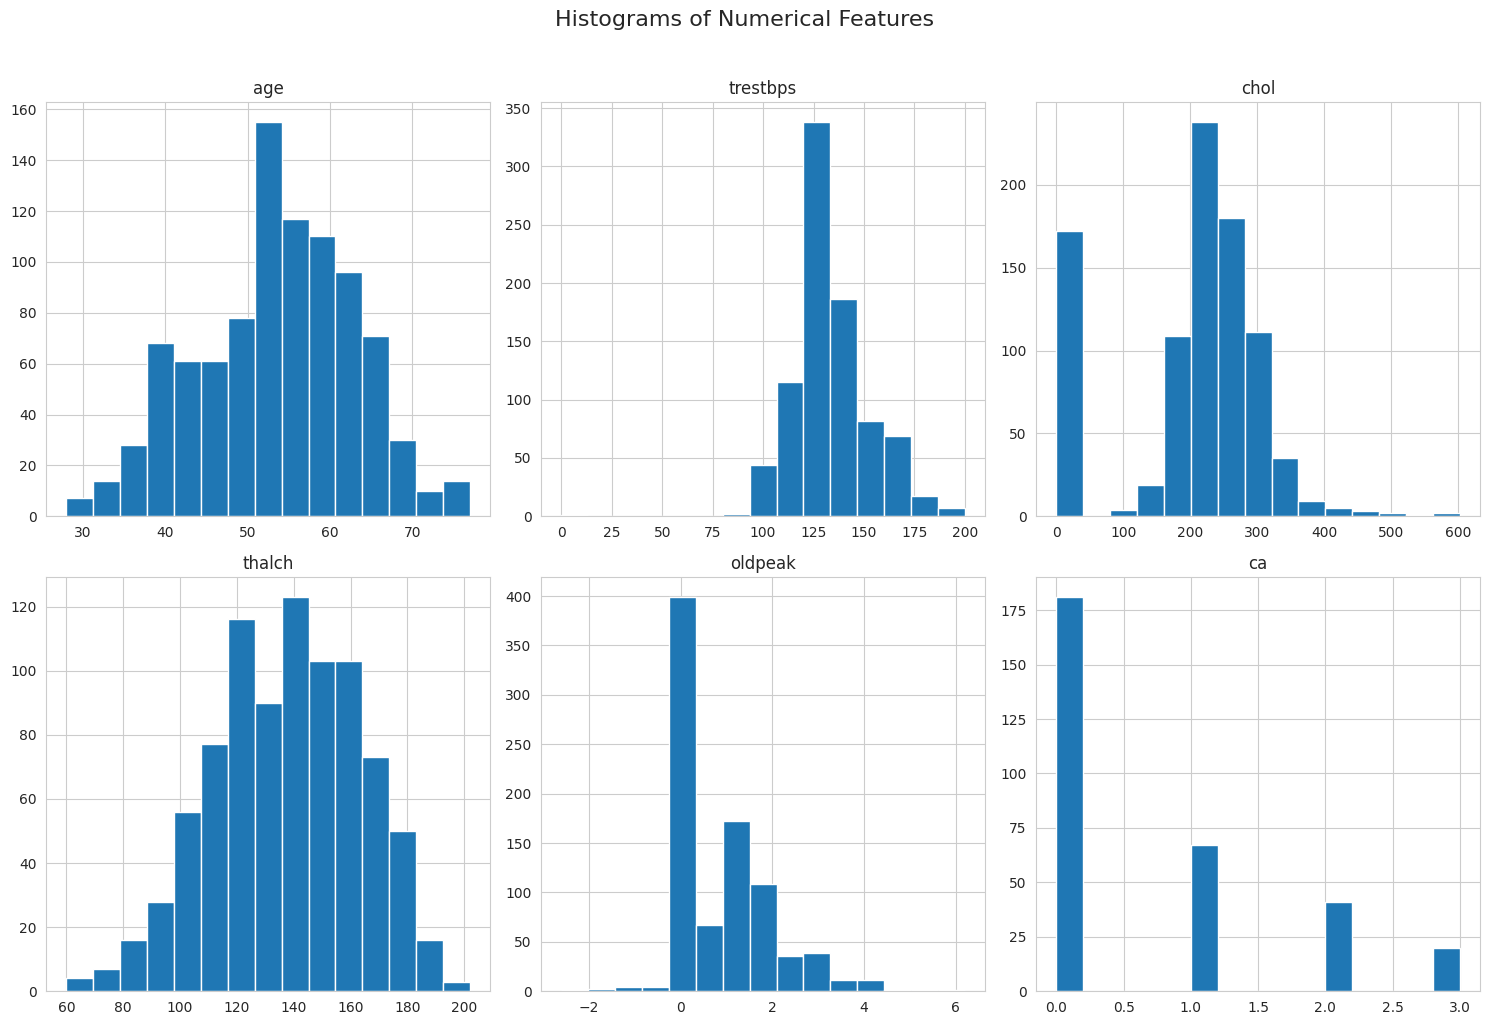

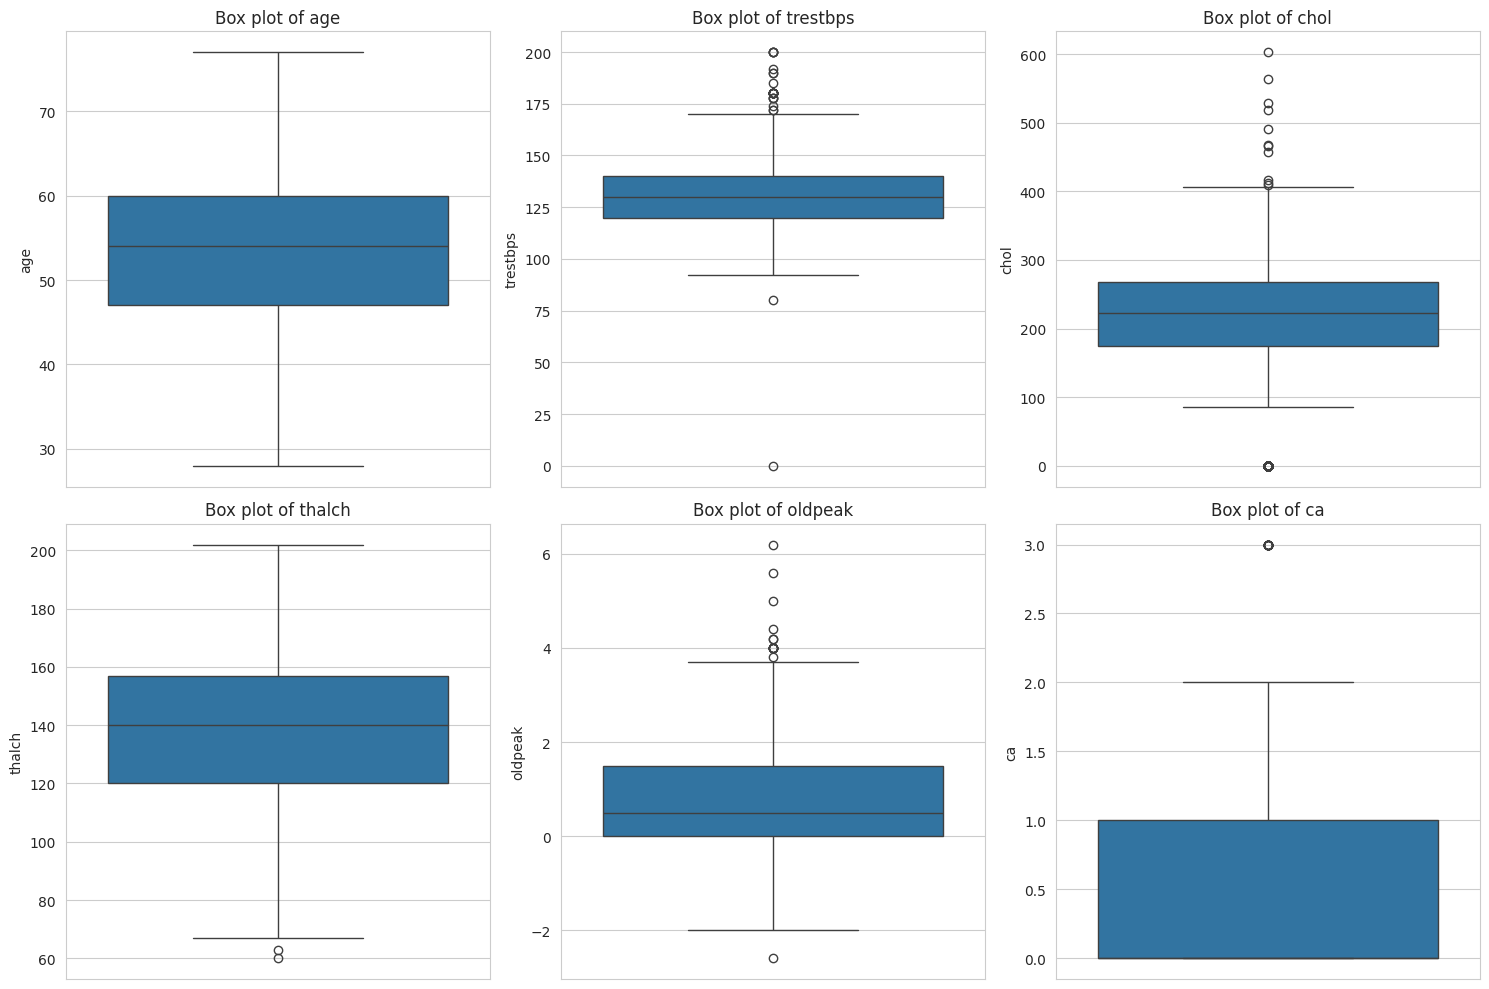

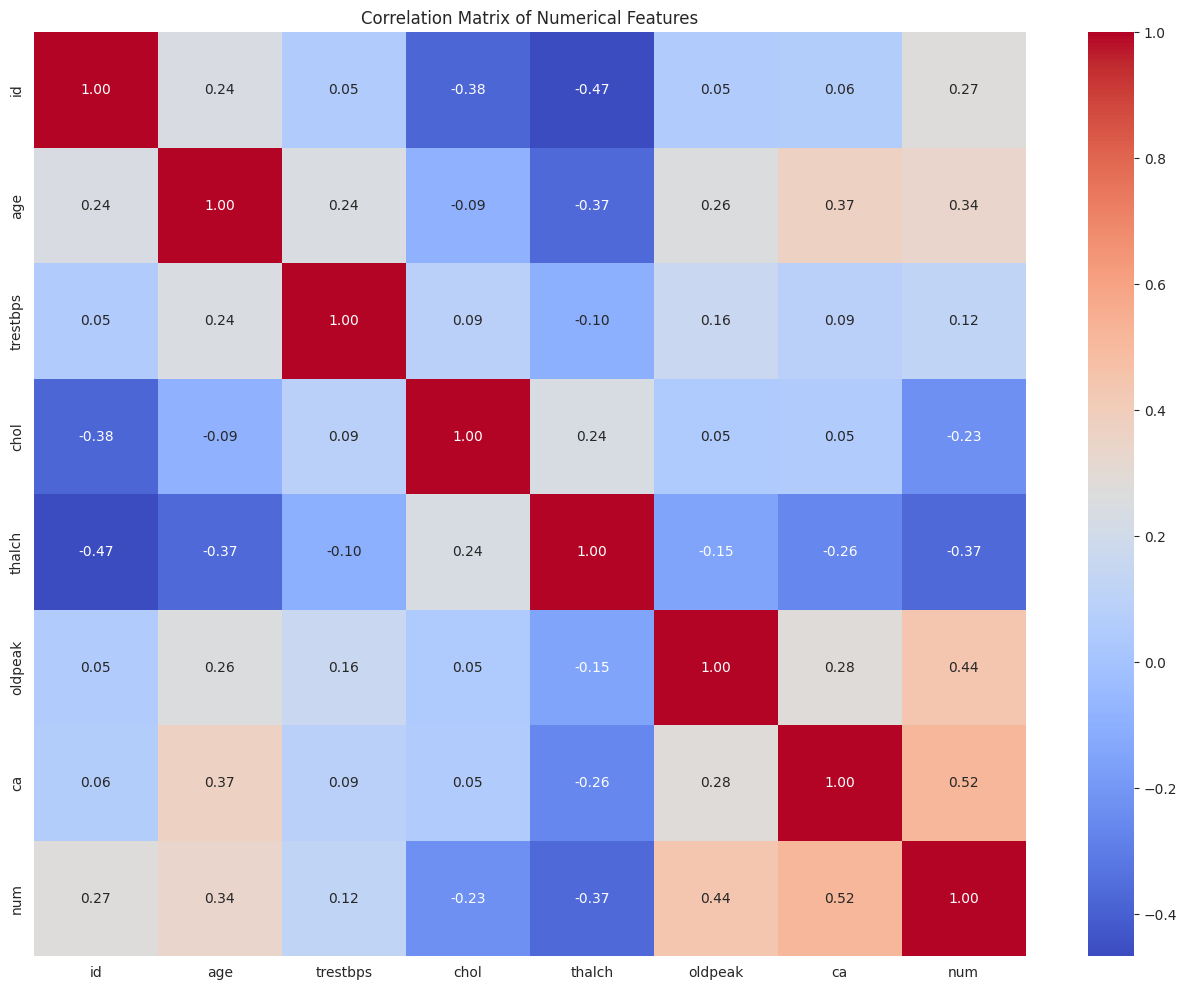

In [15]:
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Histograms for numerical features
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Correlation Heatmap (already generated, but including here for completeness of EDA plots)
plt.figure(figsize=(16, 12))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Step 4: Analyze categorical features

/tmp/ipython-input-2340651459.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i], x=df[col], palette='viridis')
/tmp/ipython-input-2340651459.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i], x=df[col], palette='viridis')
/tmp/ipython-input-2340651459.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i], x=df[col], palette='viridis')
/tmp/ipython-input-2340651459.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `

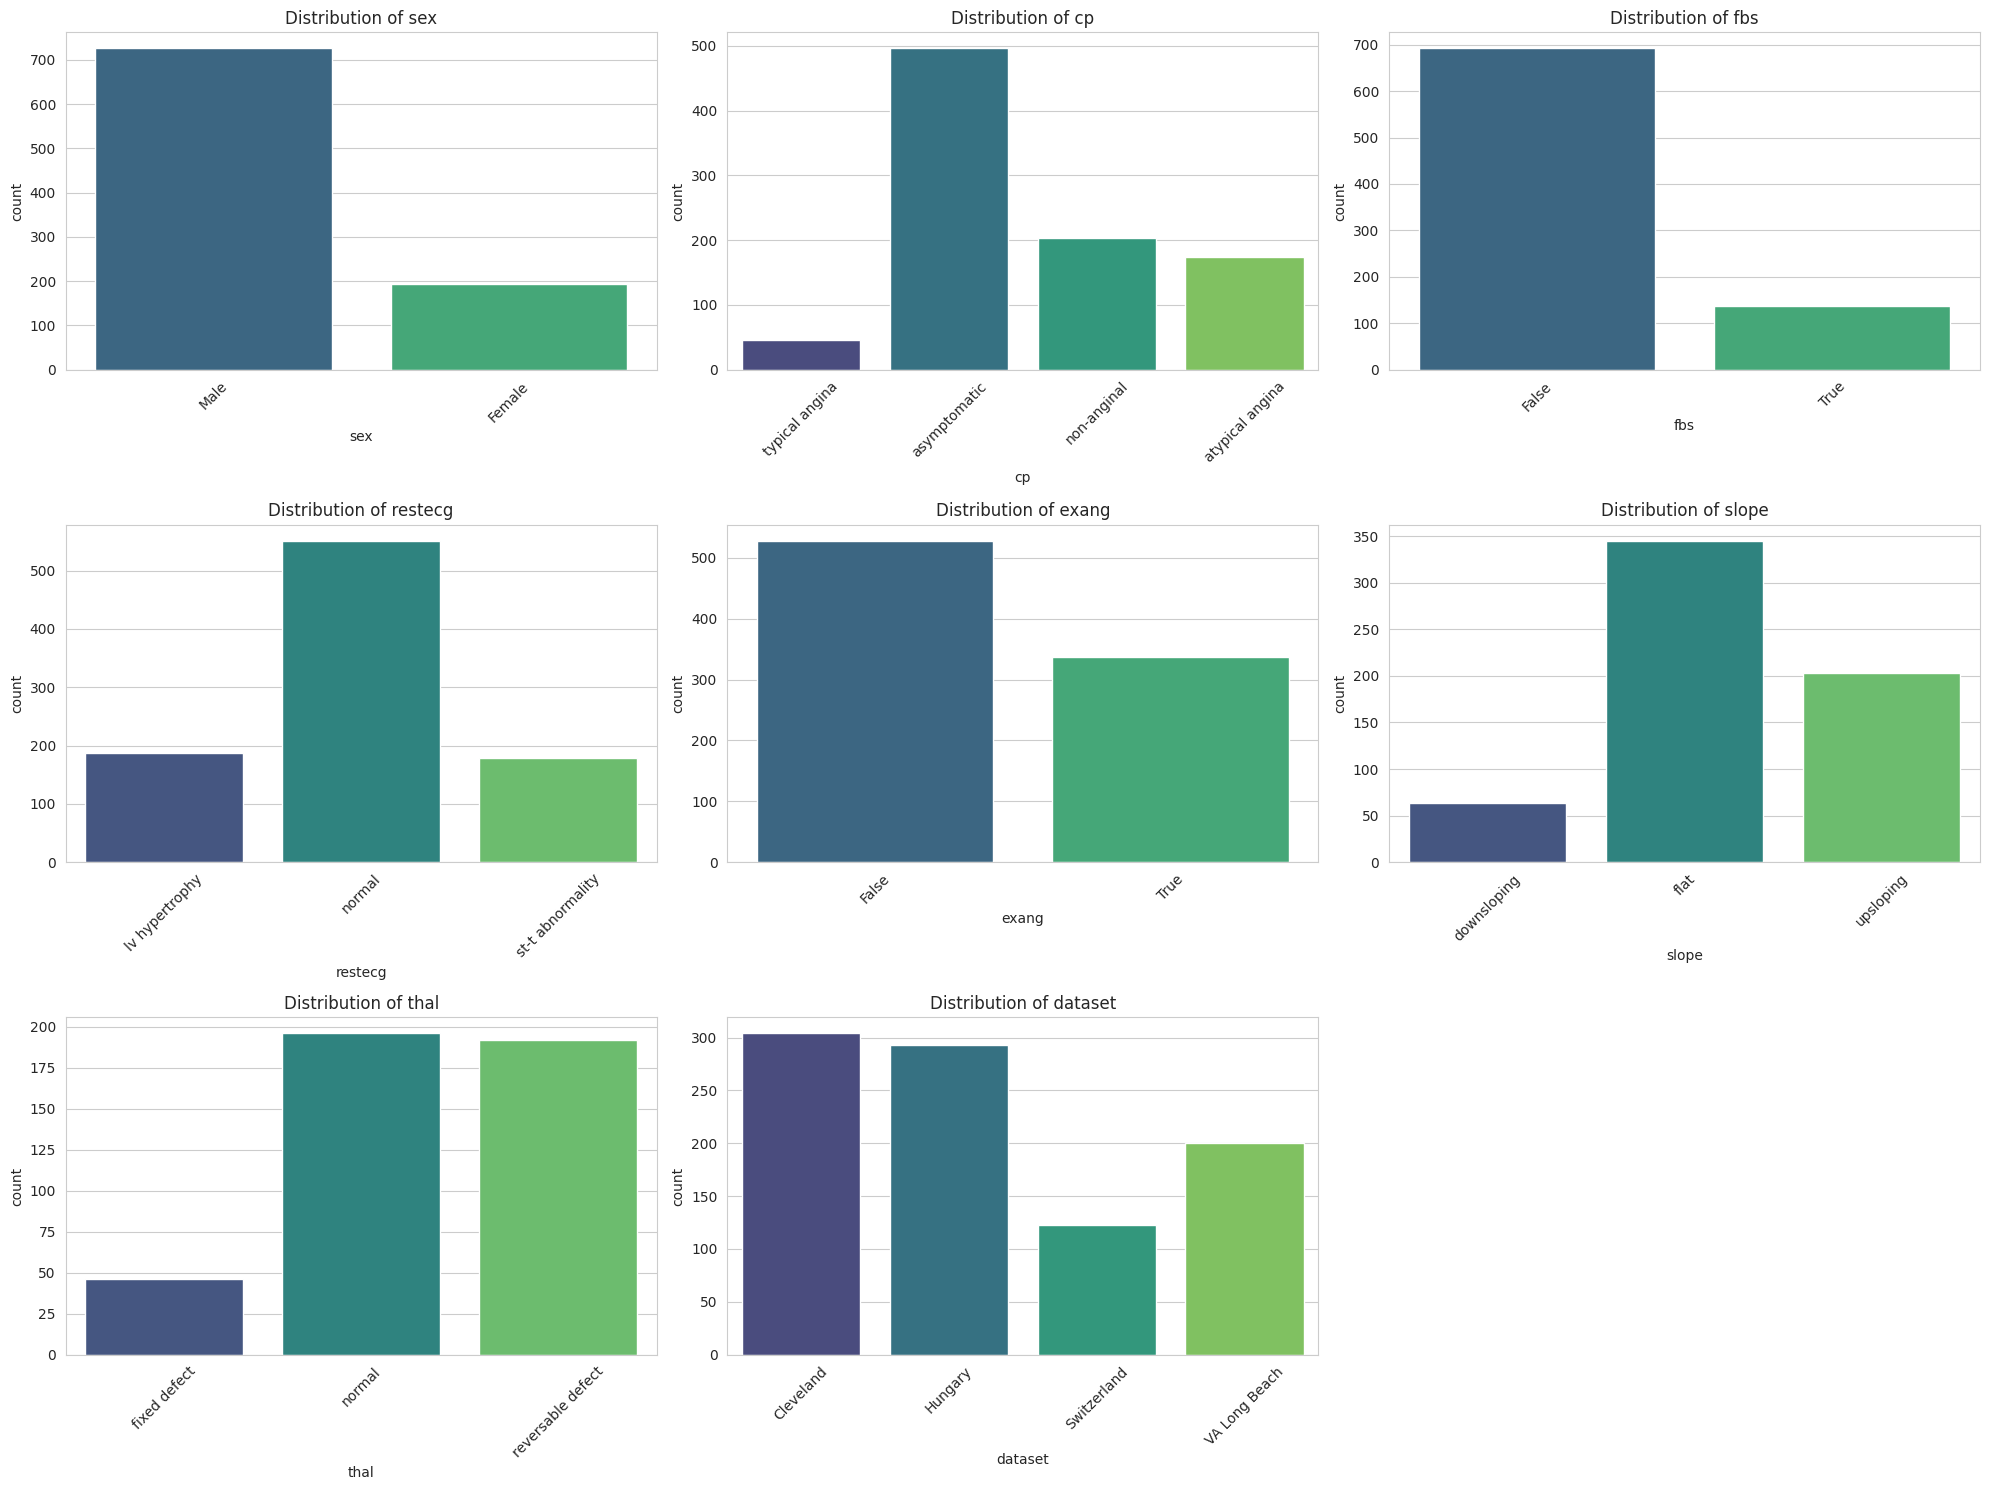

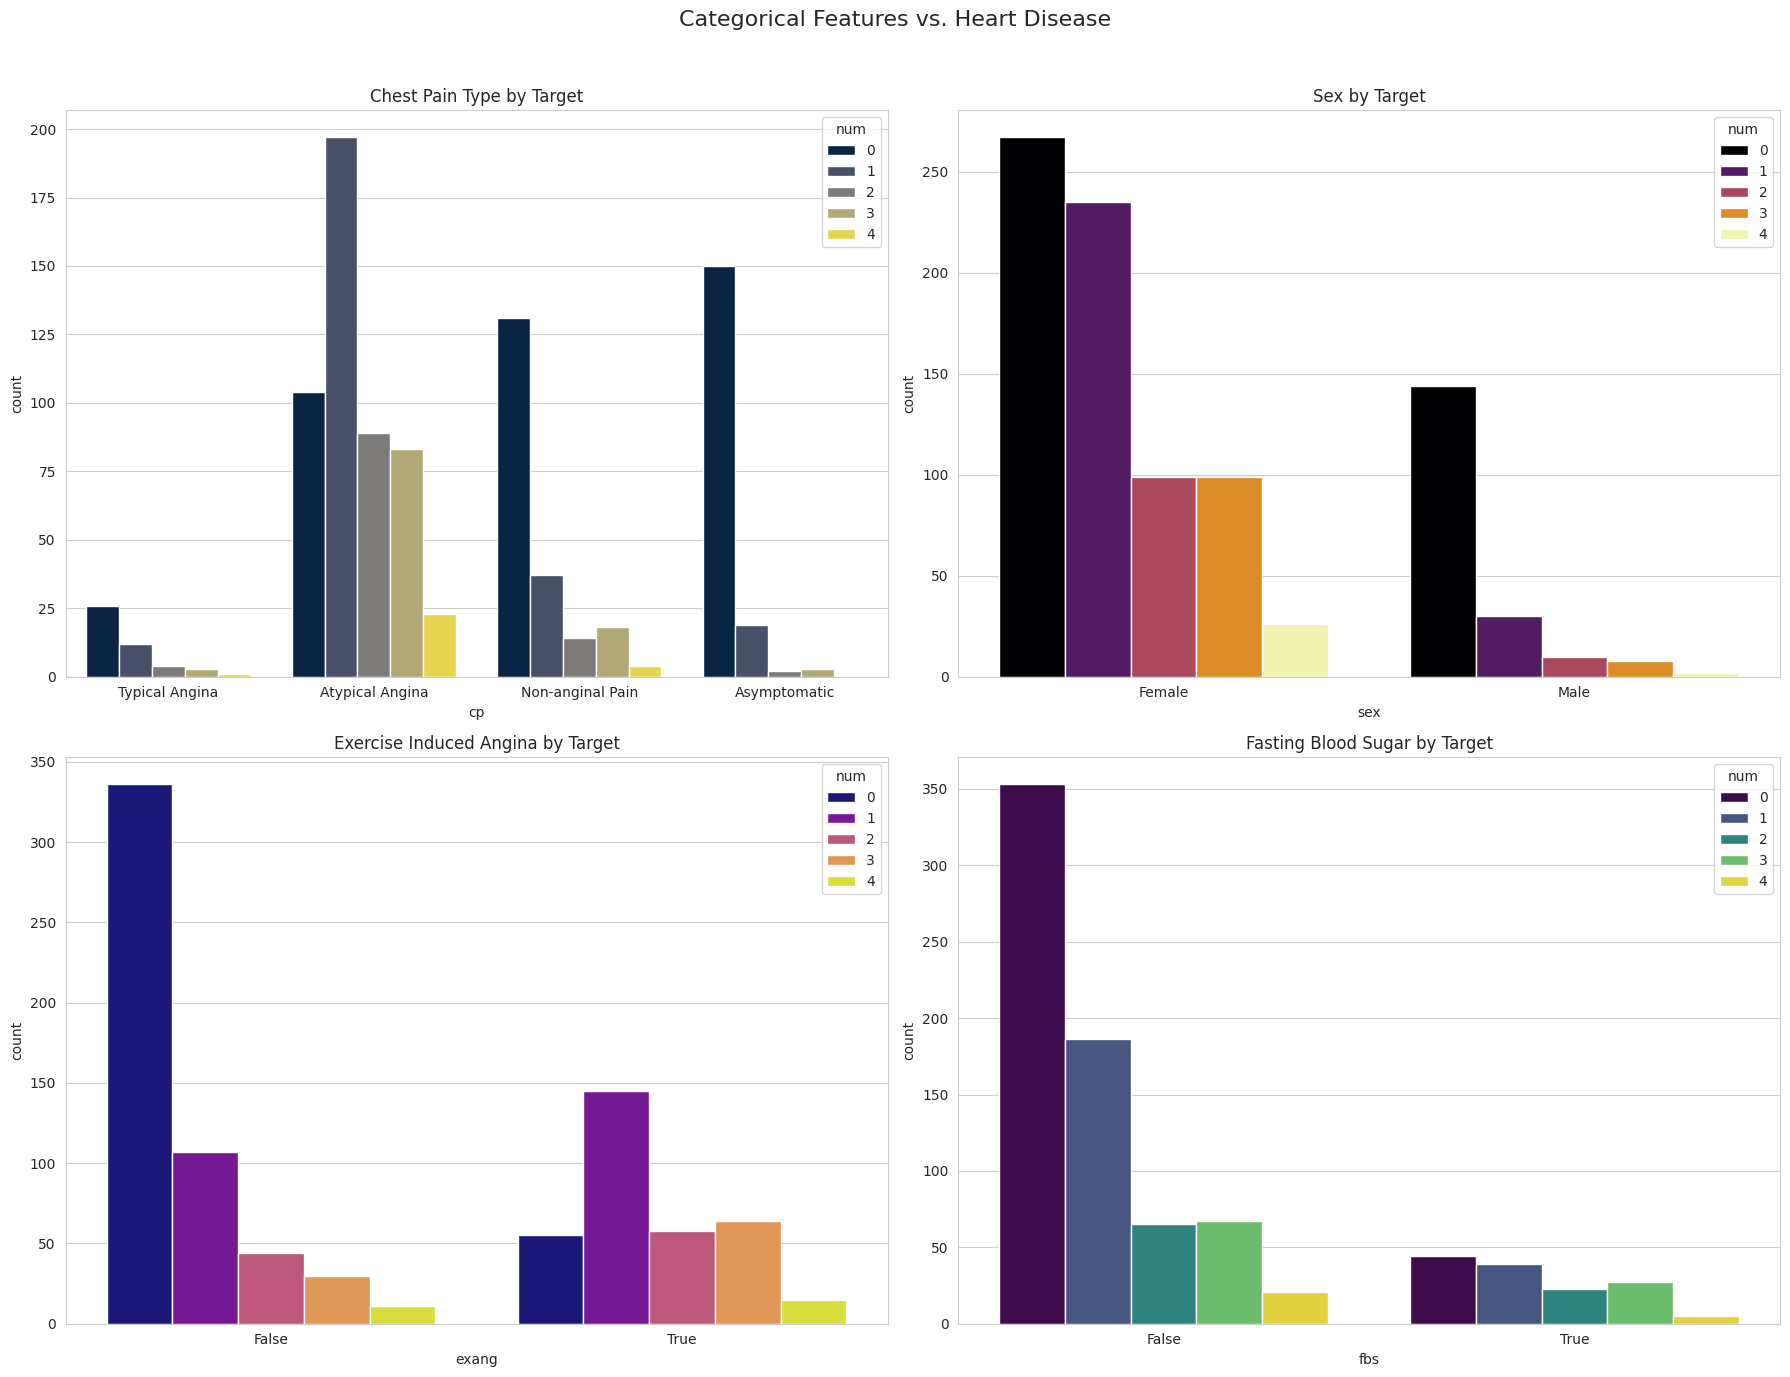

In [16]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'dataset']

# Count plots for categoricall features
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(ax=axes[i], x=df[col], palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Relationship between categorical features and target (already generated, but including here)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Categorical Features vs. Heart Disease', fontsize=16)

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[0, 0], data=df, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[0, 1], data=df, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

# Exang vs. Target
exang_plot = sns.countplot(ax=axes[1, 0], data=df, x='exang', hue='num', palette='plasma')
exang_plot.set_title('Exercise Induced Angina by Target')

# FBS vs. Target
fbs_plot = sns.countplot(ax=axes[1, 1], data=df, x='fbs', hue='num', palette='viridis')
fbs_plot.set_title('Fasting Blood Sugar by Target')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Step 5: Analyze relationships between features

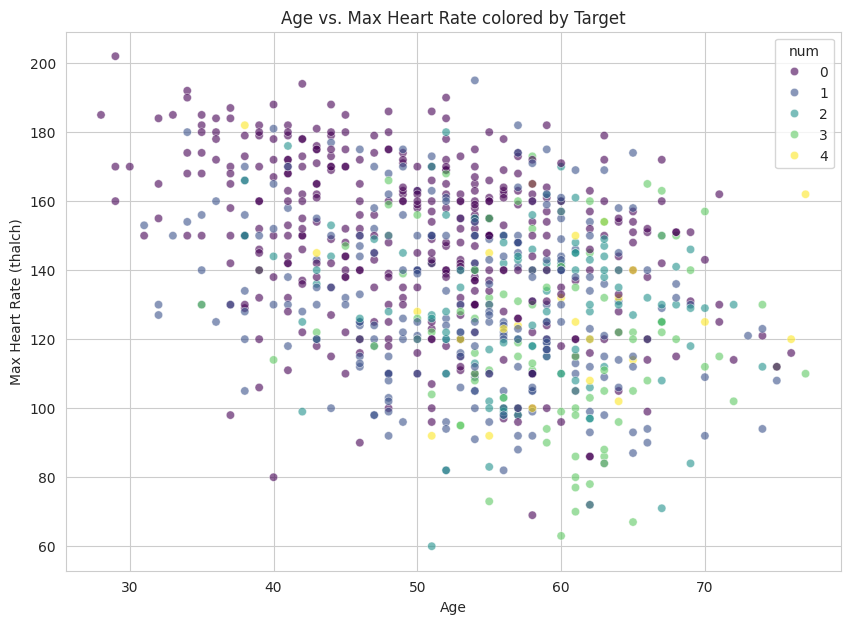

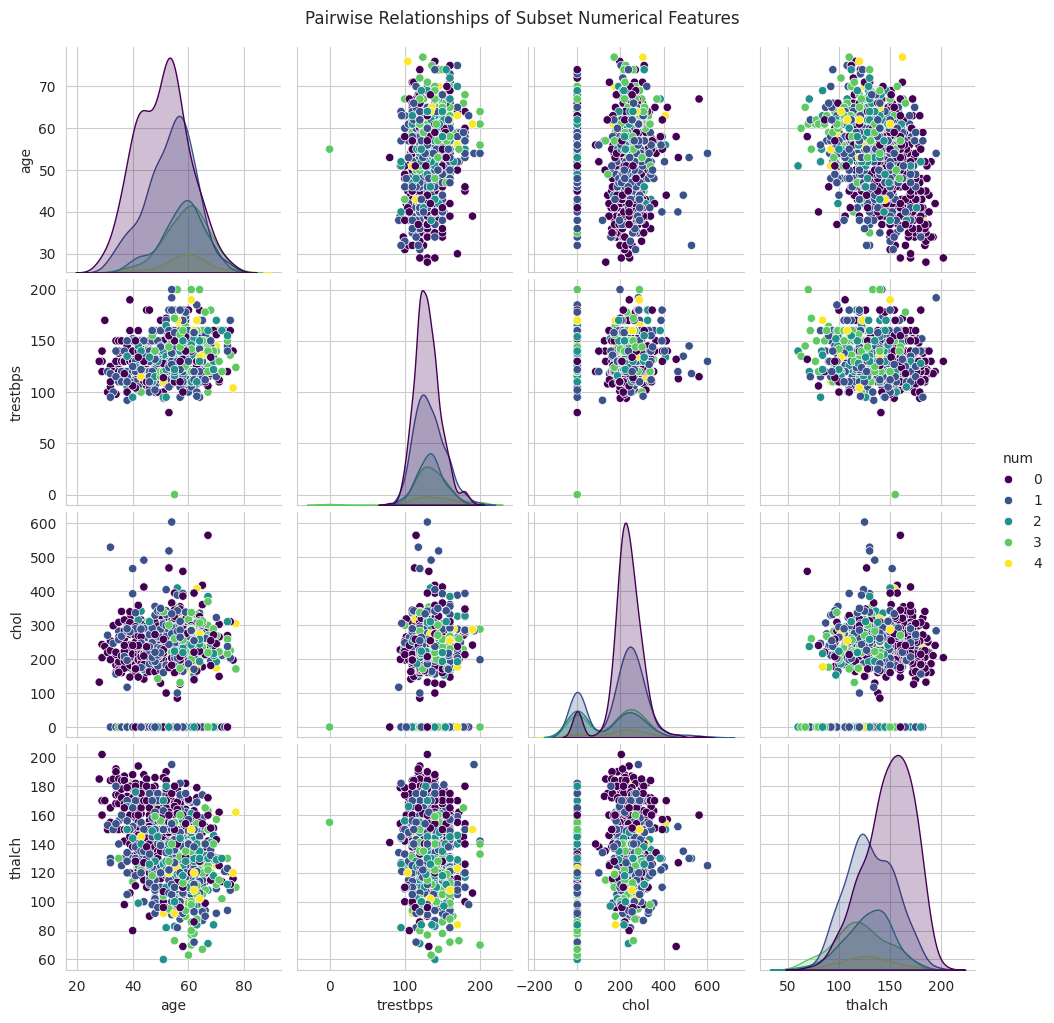

In [17]:
# Scatter plot of age vs thalch, colored by target
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='age', y='thalch', hue='num', palette='viridis', alpha=0.6)
plt.title('Age vs. Max Heart Rate colored by Target')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalch)')
plt.show()

# Pairplot for a subset of numerical features to see pairwise relationships
subset_numerical = ['age', 'trestbps', 'chol', 'thalch', 'num']
sns.pairplot(df[subset_numerical], hue='num', palette='viridis', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Subset Numerical Features', y=1.02)
plt.show()

## Step 6: Summarize findings
Based on the visualizations and summaries:

*   The target variable `num` shows the distribution of heart disease severity. We can see the counts for each category.
*   Numerical features like `age`, `trestbps`, `chol`, `thalch`, `oldpeak`, and `ca` have varying distributions and potential outliers as seen in the box plots. The correlation heatmap shows the relationships between these numerical features and the target. `thalch`, `oldpeak`, and `ca` show notable correlations with `num`.
*   Categorical features like `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `thal`, and `dataset` have different distributions. The count plots show the frequency of each category. The plots against the target variable highlight how heart disease prevalence varies across categories like `sex`, `cp`, and `exang`.
*   The scatter plot and pairplot provide insights into the relationships between pairs of numerical features and how these relationships differ based on the target variable.

* we can also analyze through pairplot that chol vs age , person lying in age in middle of 40 or 50 , have some kind of heart disease with high cholesterol around 250.




###  Model Training :(Naive_way)

In [19]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [20]:
# Fill missing numerical values with the median
numerical_cols_with_missing = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numerical_cols_with_missing:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with the mode
categorical_cols_with_missing = ['fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols_with_missing:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values filled.")

Missing values filled.


/tmp/ipython-input-3288948577.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3288948577.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [21]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [22]:
## MODEL Training :

In [23]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [24]:

df['fbs'].unique()

array([ True, False])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.6+ KB


In [26]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [28]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.6+ KB


In [30]:
# Identify categorical features (excluding 'fbs' which is already converted and 'dataset' and 'id' which are not needed for modeling)
categorical_features_for_encoding = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

# Apply one-hot encoding using pd.get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_features_for_encoding, drop_first=True)

# Drop the 'id' and 'dataset' columns from the encoded DataFrame
# df_encoded = df_encoded.drop(['id', 'dataset'], axis=1)

# Display the first few rows of the encoded DataFrame to show the changes
display(df_encoded.head())

# Display the shape of the new DataFrame to see the added columns
print(f"\nShape of the DataFrame after one-hot encoding and dropping id/dataset: {df_encoded.shape}")

,id,age,dataset,trestbps,chol,fbs,thalch,oldpeak,ca,num,...,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,63,Cleveland,145.0,233.0,True,150.0,2.3,0.0,0,...,False,False,True,False,False,False,False,False,False,False
1,2,67,Cleveland,160.0,286.0,False,108.0,1.5,3.0,2,...,False,False,False,False,False,True,True,False,True,False
2,3,67,Cleveland,120.0,229.0,False,129.0,2.6,2.0,1,...,False,False,False,False,False,True,True,False,False,True
3,4,37,Cleveland,130.0,250.0,False,187.0,3.5,0.0,0,...,False,True,False,True,False,False,False,False,True,False
4,5,41,Cleveland,130.0,204.0,False,172.0,1.4,0.0,0,...,True,False,False,False,False,False,False,True,True,False



Shape of the DataFrame after one-hot encoding and dropping id/dataset: (920, 21)


In [31]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [37]:
# # Make a copy so we don't overwrite
# df_processed = df.copy()

# # Binary categorical variables (convert to 0/1)
# df_processed["sex"] = df_processed["sex"].map({"Male": 1, "Female": 0})
# df_processed["fbs"] = df_processed["fbs"].astype(int)     # True/False → 1/0
# df_processed["exang"] = df_processed["exang"].astype(int) # True/False → 1/0

# # One-hot encode multi-category variables
# df_processed = pd.get_dummies(
#     df_processed,
#     columns=["cp", "restecg", "slope", "thal"],
#     drop_first=True
# )

In [38]:
# df_processed.head(2)

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,1,150.0,0,2.3,0.0,0,False,False,True,False,False,False,False,False,False
1,67,1,160.0,286.0,0,108.0,1,1.5,3.0,2,False,False,False,False,False,True,False,True,False


In [33]:
# df_processed["cp_atypicalangina"] = df_processed["sex"].map({"Male": 1, "Female": 0})


In [34]:
# # Identify boolean columns
# boolean_cols = df_encoded.select_dtypes(include='bool').columns

# # Convert boolean columns to integer (0 and 1)
# df_encoded[boolean_cols] = df_encoded[boolean_cols].astype(int)

# display(df_encoded.head())
# display(df_encoded.info())

In [35]:
# Make a copy so we don't overwrite the original df
df_processed = df.copy()

# Drop 'id' and 'dataset' columns first, as they are not needed for modeling
# Check if columns exist before dropping to avoid errors if they were already dropped
cols_to_drop = ['id', 'dataset']
df_processed = df_processed.drop(columns=[col for col in cols_to_drop if col in df_processed.columns])


# Binary categorical variables (convert to 0/1)
# Check if columns exist before mapping/astype to avoid errors
if 'sex' in df_processed.columns:
  df_processed["sex"] = df_processed["sex"].map({"Male": 1, "Female": 0})
if 'fbs' in df_processed.columns:
    # Ensure fbs is not already boolean or int before astype
    if df_processed['fbs'].dtype == 'object':
        df_processed["fbs"] = df_processed["fbs"].astype(str).replace("True", "1").replace("False", "0").astype(int)
    elif df_processed['fbs'].dtype == 'bool':
        df_processed["fbs"] = df_processed["fbs"].astype(int)

if 'exang' in df_processed.columns:
    # Ensure exang is not already boolean or int before astype
    if df_processed['exang'].dtype == 'object':
        df_processed["exang"] = df_processed["exang"].astype(str).replace("True", "1").replace("False", "0").astype(int)
    elif df_processed['exang'].dtype == 'bool':
        df_processed["exang"] = df_processed["exang"].astype(int)


# One-hot encode multi-category variables
categorical_cols_for_onehot = ["cp", "restecg", "slope", "thal"]
# Filter out columns that might have been dropped or don't exist
categorical_cols_for_onehot = [col for col in categorical_cols_for_onehot if col in df_processed.columns]

df_processed = pd.get_dummies(
    df_processed,
    columns=categorical_cols_for_onehot,
    drop_first=True
)

# Convert any remaining boolean columns to int (from get_dummies output)
boolean_cols_after_onehot = df_processed.select_dtypes(include='bool').columns
df_processed[boolean_cols_after_onehot] = df_processed[boolean_cols_after_onehot].astype(int)


print("Columns in df_processed before dropping 'num':", df_processed.columns.tolist())

# Separate features (X) and target (y)
if 'num' in df_processed.columns:
    X = df_processed.drop("num", axis=1)
    y = df_processed["num"]
    print("Features (X) and target (y) separated.")
    print("Shape of X:", X.shape)
    print("Shape of y:", y.shape)
else:
    print("'num' column not found in df_processed. Cannot separate features and target.")

Columns in df_processed before dropping 'num': ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca', 'num', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality', 'slope_flat', 'slope_upsloping', 'thal_normal', 'thal_reversable defect']
Features (X) and target (y) separated.
Shape of X: (920, 18)
Shape of y: (920,)


In [38]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   920 non-null    float64
 8   ca                        920 non-null    float64
 9   num                       920 non-null    int64  
 10  cp_atypical angina        920 non-null    int64  
 11  cp_non-anginal            920 non-null    int64  
 12  cp_typical angina         920 non-null    int64  
 13  restecg_normal            920 non-null    int64  
 14  restecg_st

In [39]:
# Binary target: 0 = no disease, 1 = has disease
df_processed["target"] = (df_processed["num"] > 0).astype(int)

# Features (all columns except num + target)
X = df_processed.drop(["num", "target"], axis=1)
y = df_processed["target"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (920, 18)
y shape: (920,)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [42]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   920 non-null    float64
 8   ca                        920 non-null    float64
 9   num                       920 non-null    int64  
 10  cp_atypical angina        920 non-null    int64  
 11  cp_non-anginal            920 non-null    int64  
 12  cp_typical angina         920 non-null    int64  
 13  restecg_normal            920 non-null    int64  
 14  restecg_st

In [43]:
from sklearn.preprocessing import StandardScaler

# List of numeric columns to scale
numeric_cols = ["age", "trestbps", "chol", "thalch", "oldpeak", "ca",]

scaler = StandardScaler()

# Fit on training set, transform both train and test
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [45]:
# Accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))


Train accuracy: 0.8165760869565217
Test accuracy: 0.842391304347826


Confusion Matrix:
 [[65 17]
 [12 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82        82
           1       0.84      0.88      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

ROC-AUC: 0.9021999043519847


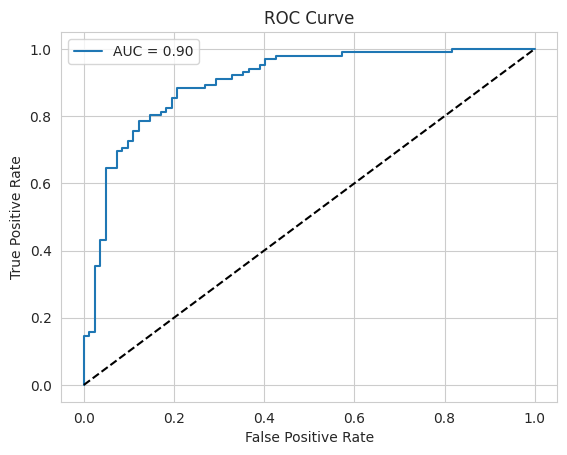

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probability of class 1

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Precision, recall, f1
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


A high AUC suggests that your model is performing well in ranking positive cases higher than negative cases. While AUC is a useful overall metric, it's also important to consider other metrics like precision, recall, and the confusion matrix, especially depending on the specific goals of your project and the costs of false positives versus false negatives.



* Interpretation of AUC values:
An AUC of 1.0 represents a perfect model that can perfectly distinguish between the positive and negative classes.
An AUC of 0.5 represents a model that performs no better than random chance.
An AUC between 0.5 and 1.0 indicates that the model performs better than random chance. The closer the AUC is to 1.0, the better the model's discriminative ability.


In [48]:
import numpy as np
import pandas as pd

coef = model.coef_[0]
features = X_train.columns

odds_ratios = np.exp(coef)

results = pd.DataFrame({
    "Feature": features,
    "Coefficient": coef,
    "Odds Ratio": odds_ratios
}).sort_values(by="Odds Ratio", ascending=False)

print(results)


                     Feature  Coefficient  Odds Ratio
1                        sex     1.121492    3.069430
6                      exang     1.010512    2.747008
14                slope_flat     0.719926    2.054282
8                         ca     0.531510    1.701500
7                    oldpeak     0.500260    1.649151
4                        fbs     0.362391    1.436760
17    thal_reversable defect     0.346439    1.414023
13  restecg_st-t abnormality     0.283409    1.327648
0                        age     0.281546    1.325177
2                   trestbps     0.062163    1.064136
12            restecg_normal    -0.062365    0.939540
15           slope_upsloping    -0.083208    0.920160
5                     thalch    -0.276574    0.758377
16               thal_normal    -0.322919    0.724033
3                       chol    -0.444951    0.640855
11         cp_typical angina    -0.923222    0.397237
10            cp_non-anginal    -1.062244    0.345679
9         cp_atypical angina

In [49]:
# # Interpretation :

# Odds ratio > 1 → increases risk of heart disease.

# Odds ratio < 1 → decreases risk.



Confusion Matrix (SVC):
 [[60 22]
 [10 92]]

Classification Report (SVC):
               precision    recall  f1-score   support

           0       0.86      0.73      0.79        82
           1       0.81      0.90      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.82       184

ROC-AUC (SVC): 0.9099713055954088


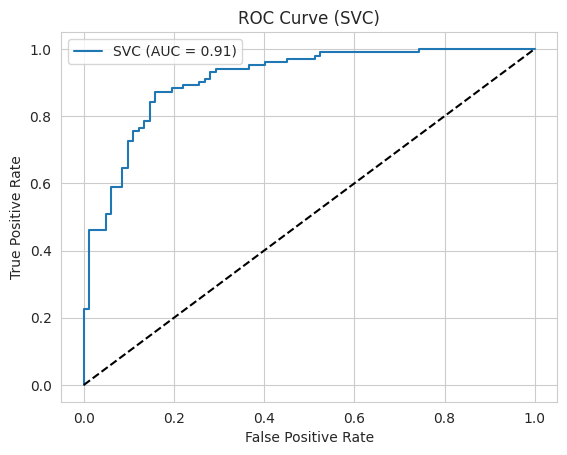

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train SVM (with probability=True so we can plot ROC)
svm_model = SVC(kernel="rbf", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix (SVC):\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report (SVC):\n", classification_report(y_test, y_pred_svm))
print("ROC-AUC (SVC):", roc_auc_score(y_test, y_prob_svm))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
plt.plot(fpr, tpr, label=f"SVC (AUC = {roc_auc_score(y_test, y_prob_svm):.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SVC)")
plt.legend()
plt.show()


In [53]:
## Interpretation of the ROC- PLOT :

# Your ROC curve is well above the diagonal and bends toward the top-left corner, which is ideal.

# At low FPR (very few false alarms), TPR is already high (~0.8+).
# That means the model is catching most positive cases while not misclassifying too many negatives.